In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
np.random.seed(11)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
data.shape

(200, 4)

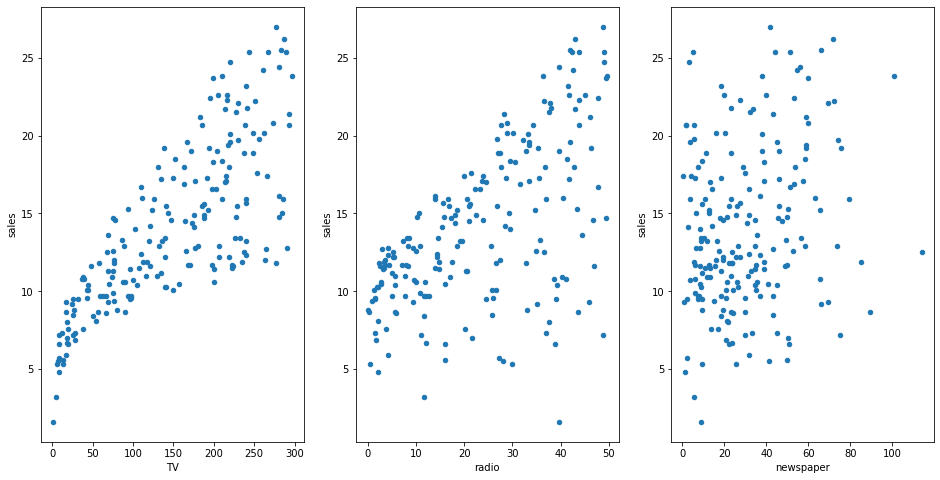

In [ ]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

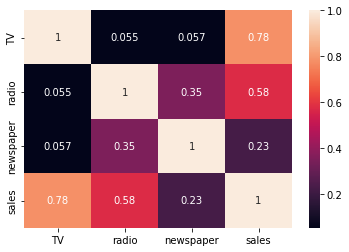

In [ ]:
sns.heatmap(data.corr(), annot = True);

### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
features = data[['TV','radio','newspaper']]
target = data[['sales']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 10, train_size = .80)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [ ]:
my_multiple_linear_model = LinearRegression()

In [ ]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

The equation is y = bo + b1x1 + b2x2 + b3x3
Where b1, b2, b3 are the 3 coefficients, i.e, the slope below.
bo is the Intercept

In [ ]:
my_multiple_linear_model.coef_

array([[ 0.0437726 ,  0.19343299, -0.00222879]])

:The above code shows that radio has high influence and news paper is the least influential

In [ ]:
my_multiple_linear_model.intercept_

array([3.25409711])

In [ ]:
# The score for  the  TEST DATA is the Rsquared in the statsmodel below
my_multiple_linear_model.score(X_train, y_train)

0.9209087553499528

Fitting Test Data (We normally fit Training Data)

In [ ]:
my_multiple_linear_model.fit(X_test,y_test)

LinearRegression()

In [ ]:
my_multiple_linear_model.coef_

array([[0.05162649, 0.17526668, 0.01186194]])

In [ ]:
my_multiple_linear_model.intercept_

array([1.58141992])

In [ ]:
# Prediction and Evaluation on Test Data
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)

In [ ]:
# Prediction and Evaluation on Train Data
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
#MAE ON TRAIN DATASET
mean_absolute_error(my_multiple_linear_preds_train,y_train)

1.0661435033472693

In [ ]:
#MAE ON TEST DATASET
mean_absolute_error(my_multiple_linear_preds,y_test)

1.8850130310423148

In [ ]:
#MSE ON TRAINING DATASET
mean_squared_error(my_multiple_linear_preds_train,y_train)

1.8585966709492503

In [ ]:
#MSE ON TEST DATASET
mean_squared_error(my_multiple_linear_preds,y_test)

6.8895926295654135

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# This is run on the Test Dataset
my_ols_model = smf.ols(formula='sales ~ TV + radio + newspaper', data = data).fit()

In [ ]:
my_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     427.1
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.97e-95
Time:                        14:24:37   Log-Likelihood:                -385.85
No. Observations:                 200   AIC:                             781.7
Df Residuals:                     195   BIC:                             798.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.721e-05   5.06e-06      9.332      0.000    3.72e-05    5.72e-05
TV             0.0458      0.001     32.788      0.000       0.043       0.049
radio          0.1888      0.009     21.888      0.000       0.172       0.206
newspaper     -0.0008      0.006     -0.129      0.897      -0.012       0.011
column1       -0.1021      0.127     -0.803      0.423      -0.353       0.149
column2        0.0069      0.001      9.332      0.000       0.005       0.008
column3        0.0095      0.001      9.332      0.000       0.007       0.011
==============================================================================
Omnibus:                       61.790   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.330
Skew:                          -1.339   Prob(JB):                     9.28e-36
Kurtosis:                       6.492   Cond. No.                     1.68e+34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.2e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#2. Build a model on training data

from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [ ]:
my_enet_model = ElasticNet()

In [ ]:
my_enet_model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.88283027312323, tolerance: 0.37599037500000004
  positive)


ElasticNet(alpha=0.7, l1_ratio=0)

In [ ]:
y_pred = my_enet_model.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

6.693942932162299

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'alpha':[0.01, 0.1, 0.2, 0.5, 0.8, 1], 'l1_ratio':[0, 0.3, 0.5, 0.7, 1]}
grid_search = GridSearchCV(my_enet_model, params, cv = 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.5, 0.8, 1],
                         'l1_ratio': [0, 0.3, 0.5, 0.7, 1]})

In [ ]:
grid_search.best_params_

{'alpha': 0.8, 'l1_ratio': 1}

## Adding Columns to Increase fetures of the MLR

In [44]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [45]:
data['column1'] = np.random.randn(len(data))
data['column2'] = np.random.randint(len(data))
data['column3'] = np.random.normal(len(data))

In [46]:
data

,TV,radio,newspaper,sales,column1,column2,column3
1,230.1,37.8,69.2,22.1,1.749455,147,200.661077
2,44.5,39.3,45.1,10.4,-0.286073,147,200.661077
3,17.2,45.9,69.3,9.3,-0.484565,147,200.661077
4,151.5,41.3,58.5,18.5,-2.653319,147,200.661077
5,180.8,10.8,58.4,12.9,-0.008285,147,200.661077
...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,-0.045275,147,200.661077
197,94.2,4.9,8.1,9.7,-0.391173,147,200.661077
198,177.0,9.3,6.4,12.8,1.534222,147,200.661077
199,283.6,42.0,66.2,25.5,-0.164193,147,200.661077


In [66]:
features = data[['TV','radio','newspaper', 'column1', 'column2', 'column3']]
target = data[['sales']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 10, train_size = .80)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 6)
(40, 6)
(160, 1)
(40, 1)


In [52]:
my_multiple_linear_model = LinearRegression()

In [53]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [54]:
my_multiple_linear_model.coef_

array([[ 0.0438441 ,  0.19401908, -0.00192103, -0.21661884,  0.        ,
         0.        ]])

In [55]:
my_multiple_linear_model.intercept_

array([3.2288744])

In [56]:
# Getting Score on Training Data
my_multiple_linear_model.score(X_train, y_train)

0.9227596994055515

In [60]:
# For Running Predictions on Test Data
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)

In [61]:
# For Running Predictions on Training Data
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
#MAE on Training Target
mean_absolute_error(my_multiple_linear_preds_train,y_train)

1.0430794707149995

In [62]:
#MAE on Test Target
mean_absolute_error(my_multiple_linear_preds,y_test)

1.8951020855826894

In [63]:
#MSE on Test Target
mean_squared_error(my_multiple_linear_preds,y_test)

6.889592629565415

In [67]:
my_ols_model = smf.ols(formula='sales ~ TV + radio + newspaper + column1 + column2 + column3', data = data).fit()

In [68]:
my_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     427.1
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.97e-95
Time:                        02:54:47   Log-Likelihood:                -385.85
No. Observations:                 200   AIC:                             781.7
Df Residuals:                     195   BIC:                             798.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.721e-05   5.06e-06      9.332      0.000    3.72e-05    5.72e-05
TV             0.0458      0.001     32.788      0.000       0.043       0.049
radio          0.1888      0.009     21.888      0.000       0.172       0.206
newspaper     -0.0008      0.006     -0.129      0.897      -0.012       0.011
column1       -0.1021      0.127     -0.803      0.423      -0.353       0.149
column2        0.0069      0.001      9.332      0.000       0.005       0.008
column3        0.0095      0.001      9.332      0.000       0.007       0.011
==============================================================================
Omnibus:                       61.790   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.330
Skew:                          -1.339   Prob(JB):                     9.28e-36
Kurtosis:                       6.492   Cond. No.                     2.20e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""